In [1]:
# Importa le librerie necessarie
import os
import torch
import torchvision.transforms as transforms
import h5py
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
# Imposta l'uso della GPU 1
torch.cuda.set_device(1)
# Verifica disponibilità GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizzato: {device}")
print(f"CUDA disponibile: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

Dispositivo utilizzato: cuda
CUDA disponibile: True
GPU: NVIDIA GeForce RTX 2080 Ti
Memoria GPU: 10.8 GB


In [ ]:
from src.embedding_extractor import EmbeddingExtractor

INPUT_FOLDER = '/equilibrium/datasets/TCGA-histological-data/hest_dataset/patches'
OUTPUT_FOLDER = '/equilibrium/datasets/TCGA-histological-data/hest_dataset/patches_embeddings'
BATCH_SIZE = 32

extractor = EmbeddingExtractor(model_name='conch_v15', patches_key='img')

# Extract embeddings
extractor.extract_embeddings_from_folder(INPUT_FOLDER, OUTPUT_FOLDER, batch_size=BATCH_SIZE)

In [2]:
from src.slide_level_inference import SlideInferenceExtractor
import os

# Define paths
FEATURES_FOLDER = '/equilibrium/datasets/TCGA-histological-data/hest_dataset/patches_embeddings'
ATTENTION_OUTPUT_FOLDER = '/equilibrium/datasets/TCGA-histological-data/hest_dataset/attention_maps'
SLIDE_EMBEDDINGS_OUTPUT_FOLDER = '/equilibrium/datasets/TCGA-histological-data/hest_dataset/slide_embeddings'

# Create output directories if they don't exist
os.makedirs(ATTENTION_OUTPUT_FOLDER, exist_ok=True)
os.makedirs(SLIDE_EMBEDDINGS_OUTPUT_FOLDER, exist_ok=True)

# Initialize the slide-level inference extractor
slide_extractor = SlideInferenceExtractor(model_name='titan', output_dir=ATTENTION_OUTPUT_FOLDER)

# Run extraction for all feature files in the folder
slide_extractor.extract_attention_from_folder(
    input_folder=FEATURES_FOLDER,
    attention_output_folder=ATTENTION_OUTPUT_FOLDER,
    slide_embedding_output_folder=SLIDE_EMBEDDINGS_OUTPUT_FOLDER
)

print("Slide-level inference and attention map extraction complete.")

Processing Slides:  22%|██▏       | 27/121 [00:09<00:17,  5.23it/s]


CUDA Out of Memory on TENX98.h5. Skipping this slide as it has too many patches for the available GPU memory.



Processing Slides:  59%|█████▊    | 71/121 [00:50<00:10,  4.95it/s]


CUDA Out of Memory on TENX99.h5. Skipping this slide as it has too many patches for the available GPU memory.



Processing Slides:  81%|████████  | 98/121 [01:33<00:05,  4.16it/s]


An unexpected error occurred on NCBI784.h5: index_add_(): self (Long) and source (Int) must have the same scalar type. Skipping.



Processing Slides: 100%|██████████| 121/121 [01:53<00:00,  1.07it/s]

Slide-level inference and attention map extraction complete.


Loaded embeddings shape: (1, 2222, 768)


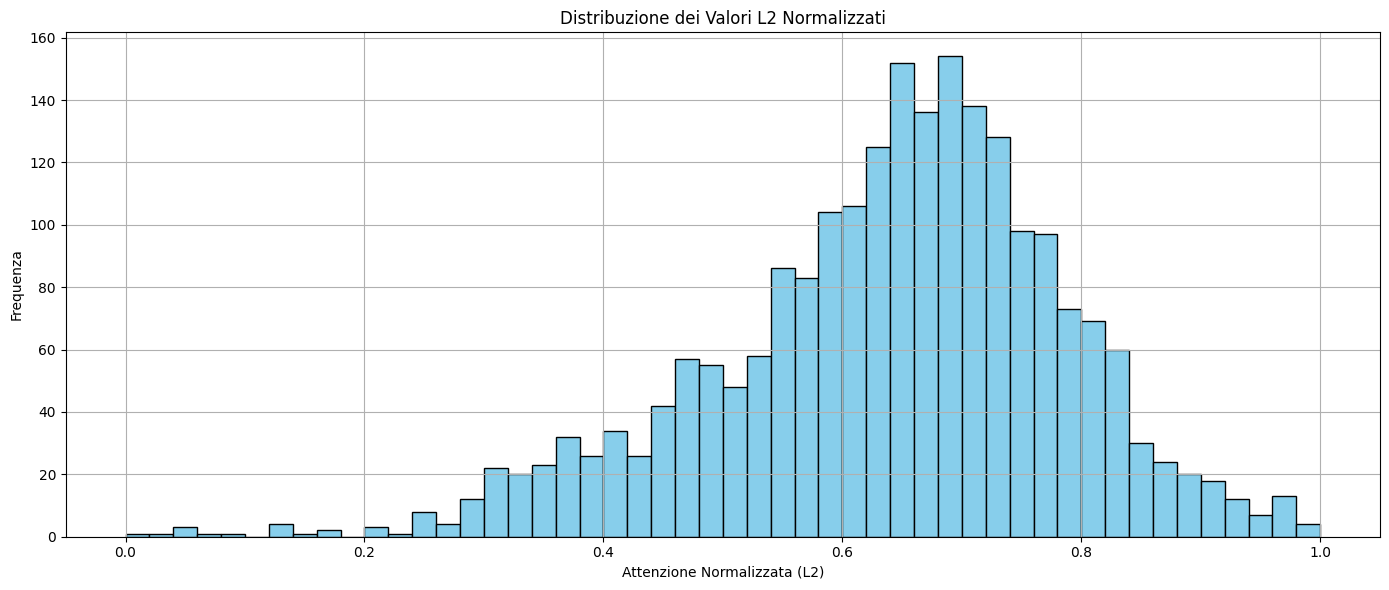

In [3]:
slide_extractor.plot_l2_attention('/equilibrium/datasets/TCGA-histological-data/hest_dataset/attention_maps/NCBI776/attention_block_0.npy')

In [3]:
import h5py
import os
import numpy as np

# --- Ispezione di un file di feature ---

# Prendi il primo file .h5 dalla cartella delle feature per analizzarlo
features_folder = '/equilibrium/datasets/TCGA-histological-data/hest_dataset/patches_embeddings'
sample_file_name = [f for f in os.listdir(features_folder) if f.endswith('.h5')][0]
sample_file_path = os.path.join(features_folder, sample_file_name)

print(f"Analizzando il file di esempio: {sample_file_path}\n")

# Apri il file HDF5 in modalità lettura
with h5py.File(sample_file_path, 'r') as f:
    # Estrai i dataset 'features' e 'coords'
    features = f['embeddings'][:]  # Carica i dati in memoria per ottenere shape e dtype
    coords = f['coords'][:]
    
    # Stampa le informazioni
    print("--- Features ---")
    print(f"Shape: {features.shape}")
    print(f"Dtype: {features.dtype}")
    print(f"Descrizione: (Numero di patch, Dimensione dell'embedding per patch)")
    
    print("\n--- Coordinate ---")
    print(f"Shape: {coords.shape}")
    print(f"Dtype: {coords.dtype}")
    print(f"Descrizione: (Numero di patch, 2) -> coordinate (x, y) di ogni patch")


Analizzando il file di esempio: /equilibrium/datasets/TCGA-histological-data/hest_dataset/patches_embeddings/SPA110.h5

--- Features ---
Shape: (412, 768)
Dtype: float16
Descrizione: (Numero di patch, Dimensione dell'embedding per patch)

--- Coordinate ---
Shape: (412, 2)
Dtype: int64
Descrizione: (Numero di patch, 2) -> coordinate (x, y) di ogni patch
